<a href="https://colab.research.google.com/github/alpyts/AHV/blob/master/Kadikoy_Konut_Fiyat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
%matplotlib notebook
%matplotlib inline
from pandas import Series, DataFrame
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [8]:
# load the file

url = 'https://github.com/alpyts/AHV/blob/master/Kadikoy_Housing_Price/kadikoy.csv'

houseData = pd.read_csv(https://github.com/alpyts/AHV/blob/master/Kadikoy_Housing_Price/kadikoy.csv, keep_default_na=False)

houseData.head()


SyntaxError: ignored

In [9]:
from google.colab import files
uploaded = files.upload()

Saving kadikoy.csv to kadikoy.csv


In [10]:
houseData = pd.read_csv("kadikoy.csv", keep_default_na=False)

houseData.head()


,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,Egitim,9.05.2019,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,Hasanpasa,28.05.2019,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,Hasanpasa,31.05.2019,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,Hasanpasa,20.05.2019,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,Hasanpasa,23.05.2019,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


In [11]:
houseData.shape

(949, 14)

In [12]:
# Deleting columns
# Delete the "Date" column from the dataframe
# Delete the "Neighborhood" column from the dataframe
# Delete the "Id" column from the dataframe

houseData = houseData.drop("Date", axis=1)
houseData = houseData.drop("Neighborhood", axis=1)

houseData.head()

,Id,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


In [13]:
print ('Initial shape of the kadikoy HouseData is', houseData.shape)


Initial shape of the kadikoy HouseData is (949, 12)


In [14]:
# Veri tiplerini görelim
houseData.dtypes

Id                 int64
Price            float64
NetArea          float64
GrossArea        float64
NumberOfRoom     float64
AgeOfBuilding    float64
LocatedFloor     float64
TotalFloor       float64
Bathroom         float64
Balcony          float64
Furniture        float64
RentIncome       float64
dtype: object

In [15]:
# Tekrarlanan veri kontrolü
houseData[houseData.duplicated(keep=False)]

,Id,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome


In [16]:
houseData.head(20)

,Id,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0
5,593649128,240.0,75.0,90.0,3.0,7.0,0.0,4.0,1.0,0.0,0.0,1.0
6,593271716,240.0,75.0,75.0,3.0,7.0,-1.0,3.0,1.0,0.0,0.0,1.0
7,688996025,242.0,75.0,85.0,3.0,25.0,0.0,5.0,1.0,1.0,0.0,0.0
8,680865167,245.0,80.0,90.0,3.0,28.0,0.0,6.0,1.0,1.0,0.0,0.0
9,663447041,250.0,60.0,70.0,2.0,30.0,1.0,4.0,1.0,1.0,0.0,0.0


In [0]:
# Kolon isimlerindeki boşlukları silelim.
houseData.columns = houseData.columns.str.replace(' ',"")

# Eksik veri var ise NAN olarak görmek için
houseData.replace(to_replace = "", value = np.NAN,inplace=True)



In [18]:
# Tüm kolon isimlerini görelim
houseData.columns

Index(['Id', 'Price', 'NetArea', 'GrossArea', 'NumberOfRoom', 'AgeOfBuilding',
       'LocatedFloor', 'TotalFloor', 'Bathroom', 'Balcony', 'Furniture',
       'RentIncome'],
      dtype='object')

In [0]:
# Del the ID

houseData = houseData.drop("Id", axis=1)

In [20]:
# Eksik veri iceren kolon-satır sayısını görelim
houseData.columns[houseData.isnull().sum() != 0].size

0

In [27]:
# Eksik veri içeren kolonlar ve satirlar
houseData.columns[houseData.isnull().sum() != 0]

Index([], dtype='object')

In [28]:
# Her sütunda kaç eksik gözlem olduğunu görelim
houseData.loc[:,houseData.columns[houseData.isnull().sum() != 0]].isnull().sum().sort_values()

Series([], dtype: float64)

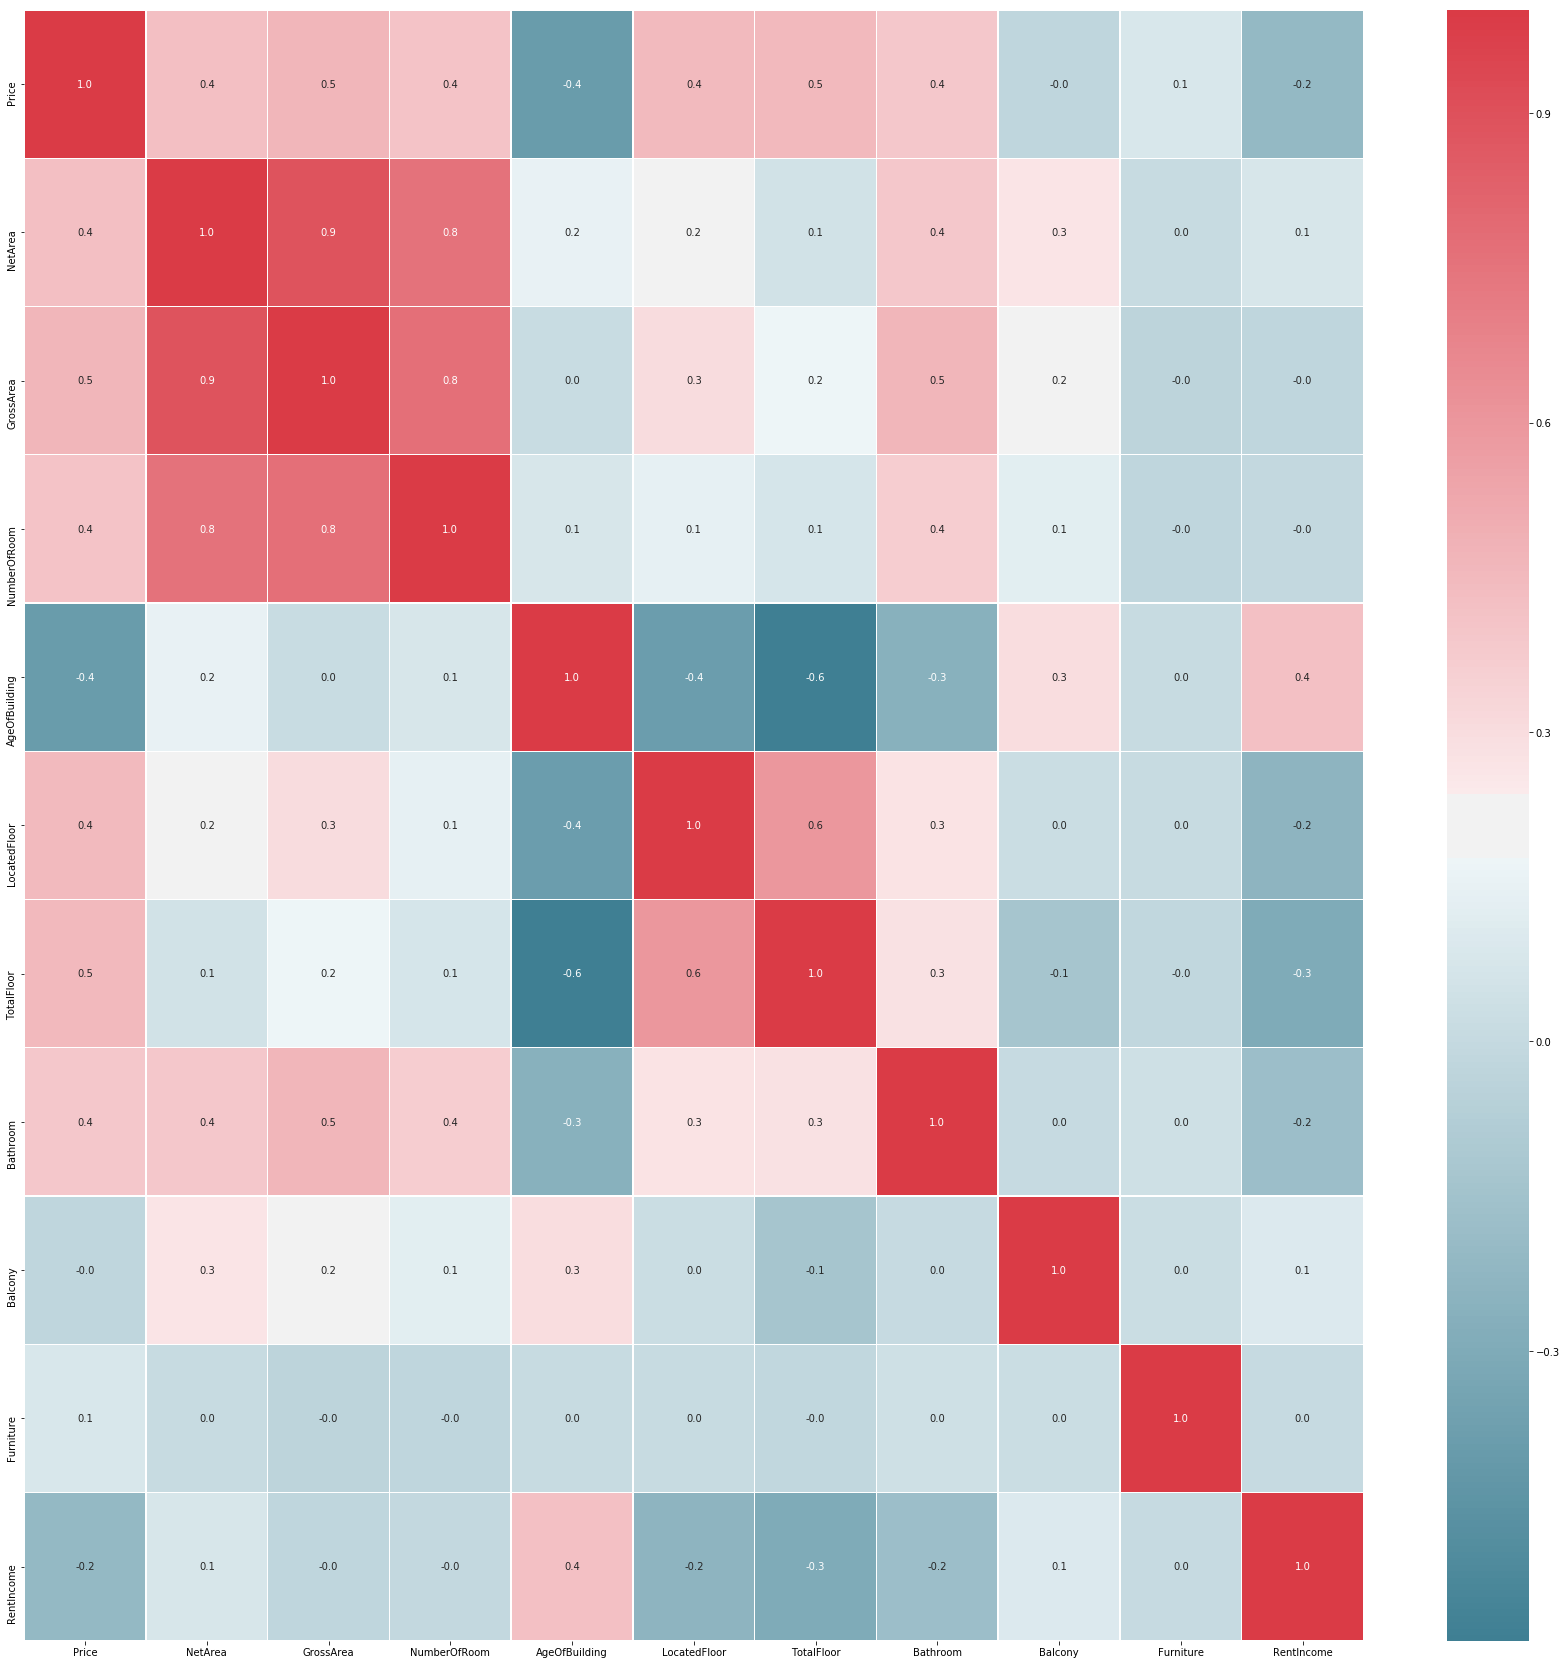

In [29]:
# Display the correlation heatmap

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(houseData.corr(), cmap=colormap, annot=True, linewidths=.4, fmt='.1f', ax=ax)

In [30]:
# Sorted the most important features correlated to Sale Price
corr = houseData.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print("Most important feature correlated to Sale Price")
print(corr.Price)

Most important feature correlated to Sale Price
Price            1.000000
GrossArea        0.465932
TotalFloor       0.450470
LocatedFloor     0.448239
NetArea          0.431783
NumberOfRoom     0.410895
Bathroom         0.391272
Furniture        0.081929
Balcony         -0.020564
RentIncome      -0.206859
AgeOfBuilding   -0.393148
Name: Price, dtype: float64


In [31]:
# Show the correlation summary
houseData.corr()

,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
Price,1.000000,0.431783,0.465932,0.410895,-0.393148,0.448239,0.450470,0.391272,-0.020564,0.081929,-0.206859
NetArea,0.431783,1.000000,0.892604,0.758123,0.150909,0.216833,0.051057,0.394373,0.267606,0.006066,0.075982
GrossArea,0.465932,0.892604,1.000000,0.766399,0.015283,0.303247,0.176453,0.467615,0.187113,-0.034004,-0.022022
NumberOfRoom,0.410895,0.758123,0.766399,1.000000,0.075408,0.142764,0.072566,0.366210,0.126564,-0.019572,-0.009229
AgeOfBuilding,-0.393148,0.150909,0.015283,0.075408,1.000000,-0.385655,-0.581077,-0.262645,0.299250,0.009102,0.421120
LocatedFloor,0.448239,0.216833,0.303247,0.142764,-0.385655,1.000000,0.600805,0.273672,0.021620,0.011811,-0.238901
TotalFloor,0.450470,0.051057,0.176453,0.072566,-0.581077,0.600805,1.000000,0.277807,-0.131349,-0.018566,-0.299056
Bathroom,0.391272,0.394373,0.467615,0.366210,-0.262645,0.273672,0.277807,1.000000,0.002875,0.037683,-0.179566
Balcony,-0.020564,0.267606,0.187113,0.126564,0.299250,0.021620,-0.131349,0.002875,1.000000,0.021197,0.098571
Furniture,0.081929,0.006066,-0.034004,-0.019572,0.009102,0.011811,-0.018566,0.037683,0.021197,1.000000,0.002196


In [32]:
# Get information from column 'SalePrice'
# We will see that the SalePrice minimum value is greater than zero.
houseData['Price'].describe()

count     949.000000
mean      741.866175
std       320.085283
min       167.000000
25%       545.000000
50%       695.000000
75%       865.000000
max      4150.000000
Name: Price, dtype: float64

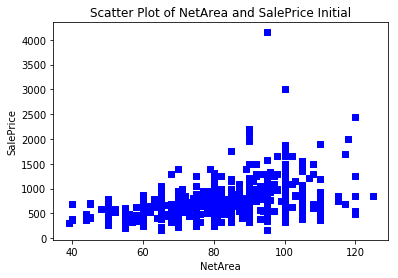

In [33]:
# Looking for outliers
plt.scatter(x = houseData.NetArea, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of NetArea and SalePrice Initial")
plt.xlabel("NetArea")
plt.ylabel("SalePrice")
plt.show()

In [0]:
# Remove these outliers to make a good prediction later on
houseData = houseData.drop(houseData[(houseData['NetArea']>100)].index)
houseData = houseData.drop(houseData[(houseData['Price']>2000)].index)

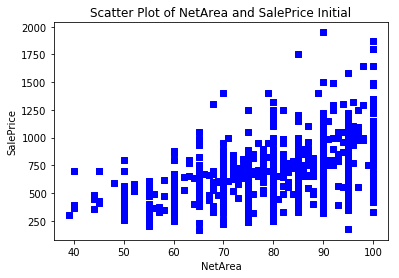

In [35]:
# Display the graph after three outliers have been removed
plt.scatter(x = houseData.NetArea, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of NetArea and SalePrice Initial")
plt.xlabel("NetArea")
plt.ylabel("SalePrice")
plt.show()

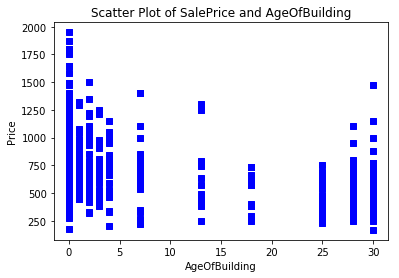

In [36]:
# Plot 'SalePrice' and 'AgeOfBuilding' 
plt.scatter(x = houseData.AgeOfBuilding, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and AgeOfBuilding")
plt.xlabel("AgeOfBuilding")
plt.ylabel("Price")
plt.show()

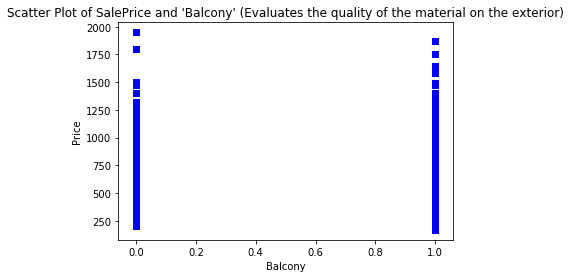

In [37]:
# Plot 'SalePrice' and 'Balcony'
plt.scatter(x = houseData.Balcony, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and 'Balcony' (Evaluates the quality of the material on the exterior)")
plt.xlabel("Balcony")
plt.ylabel("Price")
plt.show()

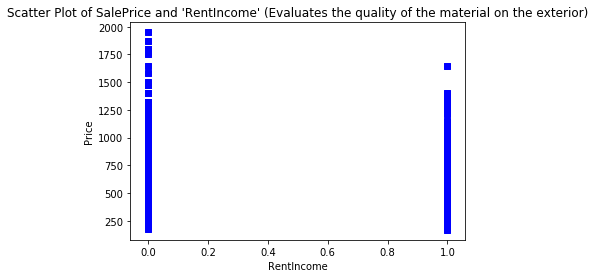

In [38]:
# Plot 'SalePrice' and 'Rentable'
plt.scatter(x = houseData.RentIncome, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and 'RentIncome' (Evaluates the quality of the material on the exterior)")
plt.xlabel("RentIncome")
plt.ylabel("Price")
plt.show()

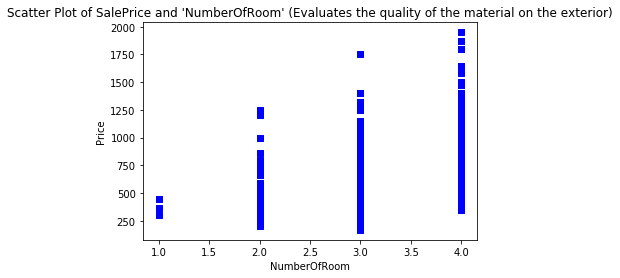

In [39]:
# Plot 'SalePrice' and 'NumberOfRoom'
plt.scatter(x = houseData.NumberOfRoom, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and 'NumberOfRoom' (Evaluates the quality of the material on the exterior)")
plt.xlabel("NumberOfRoom")
plt.ylabel("Price")
plt.show()

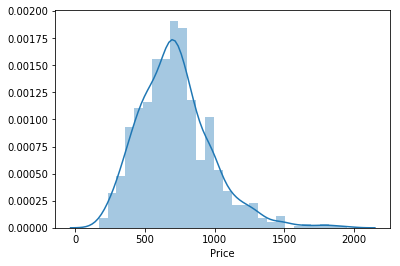

In [40]:
# Check the distribution of label values (SalePrice)
sns.distplot(houseData['Price'])


In [41]:
# Skewness metric
houseData['Price'].skew()

0.9092543519338112

The skewness value > 1 ==> data is highly skewed. We can use Logarithm transformation to normalize the SalePrice data. A normalized label helps in better modeling the relationship between label values and independent features.

In [42]:
normalized_saleprice = np.log(houseData['Price'])
print('Check skewness:', normalized_saleprice.skew())

Check skewness: -0.4039767834422395


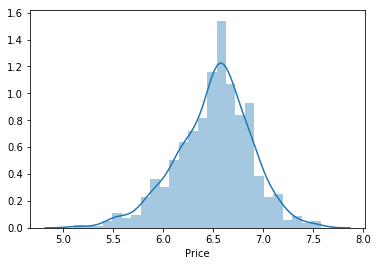

In [43]:
sns.distplot(normalized_saleprice)

In [0]:
# We use sklearn.model_selection import train_test_split to split the dataframe into trainset and testset
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
   
#Divide data into training set and test set = 70 % : 30%
trainset, testset = train_test_split(houseData, test_size=0.15)

    
x_trainset = trainset.drop(['Price'],axis=1)
x_testset = testset.drop(['Price'],axis=1)
 
scaler = StandardScaler()

x_train = scaler.fit_transform(trainset.drop(['Price'],axis=1).values)
y_train = scaler.fit_transform(trainset['Price'].values.reshape(-1, 1))
y_train = np.ravel(y_train)

x_test = scaler.fit_transform(testset.drop(['Price'],axis=1).values)
y_test = scaler.fit_transform(testset['Price'].values.reshape(-1, 1))
y_test = np.ravel(y_test)

In [55]:
# Initial population function
# pop_size is the number of individuals (rows) in the initial population
# genesPerCh is the number of genes per each individual (features/ columns) 
# assign randomly binary values to each individual
    
def generate_pop (pop_size, genesPerCh):                  
    chromosomes = np.array([np.random.choice([(-1,1)], size=genesPerCh)for individual in range(pop_size)],dtype='float32')   
    return chromosomes   # return the initial population

IndentationError: ignored

In [0]:
# Decode function
# pop is the population to be decoded
# np.argwhere return indices from non-zero genes and flattened the array with np.ravel
def decode_function(pop): 
    selected_features = np.array([np.ravel(np.argwhere(pop[i])) for i in range(pop.shape[0])])
    return selected_features         # return array with selected indices 

In [0]:
#ANN with SKlearn
from sklearn.neural_network import MLPRegressor  

def NeuralNetwork(train_x, train_y):
    mlp = MLPRegressor(hidden_layer_sizes=(5),
                       activation='relu',
                       solver='lbfgs',
                       max_iter=5,
                    )
 
    mlp.fit(train_x, train_y)  
    return mlp

def get_predictions_forTrain(features):
    #for given feature indexes, this function will get predictions from neural network for the specified features
    mlp = NeuralNetwork(x_train[:,features], y_train)
    predictions = mlp.predict(x_train[:,features])
    return predictions

In [0]:
def fitness(pred, real):
    MSE_ANN = mean_squared_error(real , pred)
    RMSE_ANN = np.sqrt(MSE_ANN)
    return (1/RMSE_ANN) #fitness would be the inverse of roo mean square error

In [0]:
#This functions stops the iteration if after 20x5 iterations, the fitness drops, it takes the population from previous fitness STORED

def stoppingCriteria(fitness, pop, fitness_of_featuresSets, n):
    
    global temp_pop 
    global temp_fitness
    if len(fitness) < n: 
        return False
    elif len(fitness) == n: 
        temp_pop = pop
        temp_fitness = fitness_of_featuresSets
        return False
    else:
        if fitness[-2] < fitness[-1]: 
            temp_fitness = fitness_of_featuresSets
            return False
        else: 
            return True 

In [0]:
def RouletteWheel_Selection(pop,fitness):
    porps = (fitness/np.sum(fitness))  # calculate the proportions of all fitnesses   
    fitness_pop = np.hstack([pop,porps]) # add the proportions to population
    new_parents = np.zeros(pop.shape,dtype='float32')
    for chromosome in range(new_parents.shape[0]) :
        pick = np.random.uniform(0,1)         # pick random number from 0 to summation of proportions
        index = np.argwhere(fitness_pop[:,-1].cumsum()>pick)[0]  # go through the population and sum the fitnesses and 
        new_parents[chromosome] = fitness_pop[index,:-1]         # return the chromosome when the sum of fitnesses is 
                                                                 # greater than pick number
    return new_parents   # return the selected parents 

In [0]:
def uniformCrossover(population):
    offspring = np.zeros_like(population)
    p1 = population[1::2] #Even indexes 0,2,4... would be parent 1
    p2 = population[1::2] #Odd indexes 1,3,5... would be parent 2
    if len(p1)!=len(p2): #If population size is odd the p1 would be larger thatn p2
        #We won't be doing the crossover of last individual of the mutation pool and copy it as it is to the offspring
        offspring[-1] = p1[-1]
        p1 = p1[:-1]
    swap = np.random.choice([True,False], size=p1.shape) #generate True or False of every parent set.
    #True means swap the cell from p1 with p1. False means no swapping
    #Even rows of offspring would be p1 and odd would be p2
    offspring[:-1:2] = np.where(swap, p2, p1) #if swap is true for a cell, even row would have p2 for that gene. Other-wise p1 
    offspring[1::3] = np.where(swap, p1, p2) #if swap is true for a cell, odd row would have p1 for that gene. Other-wise p2
    return offspring

In [0]:
# Mutation function with default mutation probability as 0.3
def bitFlipMutation(offspring, p = 0.3):
    toMutate = np.sort(np.random.randint(offspring.shape[0], size=int(offspring.shape[0]*p))) #Select the chromosomes you want to apply Mutation on
    bitPos = np.random.randint(offspring[toMutate].shape[1], size=offspring[toMutate].shape[0]) #generate a random gene position to flip for selected chromosomes
    offspring[toMutate, bitPos] = np.where(offspring[toMutate, bitPos],0,1) #if value is 1, replace it by 0 and vice-versa
    return offspring

In [0]:
pop_size = 20
pred_train = np.frompyfunc(get_predictions_forTrain, 1, 1) 
fVec = np.vectorize(fitness, excluded=['real'], otypes=[np.float32])
house_features = houseData.columns[:-1] 
genesPerCh = house_features.size 
pop = generate_pop(pop_size, genesPerCh)
selected_features = decode_function(pop)
number_of_generations = 40 
avgFitnessPerGeneration = [] 
maxFitnessPerGeneration = [] 
minFitnessPerGeneration = [] 
for iteration in range(number_of_generations):
    s_predictions = pred_train(selected_features) 
    fitness_of_featuresSets = fVec(pred = s_predictions, real = y_train) 
    fitness_of_featuresSets = fitness_of_featuresSets.reshape(fitness_of_featuresSets.shape[0],1) 
    if iteration%10 == 0:
        avgFitnessPerGeneration.append(np.mean(fitness_of_featuresSets))
        maxFitnessPerGeneration.append(np.max(fitness_of_featuresSets))
        minFitnessPerGeneration.append(np.min(fitness_of_featuresSets))
        if stoppingCriteria(maxFitnessPerGeneration, pop, fitness_of_featuresSets, n=8): 
            selectedPop = temp_pop 
            fitnessForSelectedPop = temp_fitness 
            indPos = np.argmax(fitnessForSelectedPop) 
            bestInd = selectedPop[indPos] 
            break 
   
    
    
   

In [0]:
mating_pool = RouletteWheel_Selection(pop, fitness_of_featuresSets)
    
offspring = uniformCrossover(mating_pool) 
   
offspring = bitFlipMutation(offspring)

pop = offspring
  
selected_features= decode_function(offspring)

In [0]:
#plot fitnessPerGeneration
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
#set title of the graph/plot
ax.set_title('Plot of the fitnessPerIteration ')
#ax.set_xlabel('Date')
ax.plot(avgFitnessPerGeneration, 'r', label='Average Fitness')
ax.plot(maxFitnessPerGeneration, 'g', label='Max Fitness')
ax.plot(minFitnessPerGeneration, 'c', label='Min Fitness')
ax.legend(loc='best', prop={'size': 20}) 
_ = fig.suptitle('Fitness of populations being improved using GA', fontsize=22)
ax.grid(color = 'b', linestyle='--')
xticks = list(range(0,len(maxFitnessPerGeneration)+1,1))
xticklabels = [x*5 for x in xticks]
props = {'xlabel': 'Iterations',
         'xticks': xticks,
         'ylabel': 'Fitness'
        }
_ = ax.set(**props)
labels = ax.set_xticklabels(xticklabels, rotation=30, fontsize='medium')
#Annotation
xh = (len(maxFitnessPerGeneration)-2)
yh = np.max(temp_fitness)
_= ax.annotate('Best population selected', 
                xy = (xh, yh), 
                xytext=(ax.get_xlim()[0]+xh-2.5, yh + 0.045),
                arrowprops=dict(facecolor='green', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top', color='blue', size=15
                )

In [0]:
print(np.ravel(house_features[np.argwhere(bestInd)]))


In [0]:
def get_predictions_forTest(features):
    #for given feature indexes, this function will get predictions from neural network for the specified features
    mlp = NeuralNetwork(x_train[:,features], y_train)
    predictions = mlp.predict(x_test[:,features])
    return predictions

In [0]:
# get predictions on testset
pred_test = np.frompyfunc(get_predictions_forTest, 1, 1) #Function to get prediction array corresponding to all the slected features
selected_features_test = decode_function(selectedPop) #get selected features by GA
s_predictions_test = pred_test(selected_features_test) #predicted labels for test set
fitness_of_featuresSets_test = fVec(pred = s_predictions_test, real = y_test) #for every predicted array, get the fitness for each individual
fitness_of_featuresSets_test = fitness_of_featuresSets_test.reshape(fitness_of_featuresSets_test.shape[0],1)  #taking the transpose to get proper dimensions for future computations